## Linear Regression

### Importing libraries

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Dataset loading

Download the dataset: [Area Price](https://drive.google.com/file/d/1xXwqPthbthzkqfSLOWnXe_17qWKKVXhu/view?usp=drive_link)

In [3]:
# using a area dataset that consists only two columns area (sq feet) and price (rs)

data_path = "../../datasets/area_price_dataset.csv"
df = pd.read_csv(data_path)

df.head()

,Area,Price
0,1360,392759
1,4272,1318545
2,3592,1103580
3,966,371217
4,4926,1601769


In [4]:
# observing the relation between the variables

df.corr()

,Area,Price
Area,1.000000,0.991741
Price,0.991741,1.000000


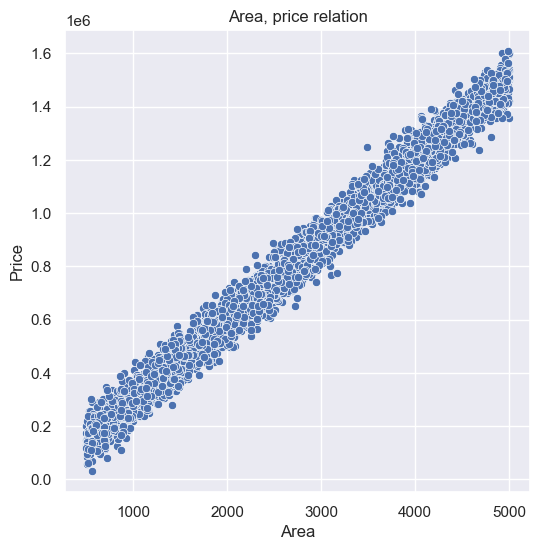

In [5]:
# can obsrve that, area and price are highly correlated

sns.set_theme(style='darkgrid')
plt.figure(figsize=(6,6))
sns.scatterplot(df, x = 'Area', y = 'Price')
plt.title("Area, price relation")
plt.show()

#### using the linear regression model for getting the weight and intercept

In [6]:
model = LinearRegression()

X = df[['Area']]
y = df['Price']
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# predicting the values
model.predict([[3345]])

array([1003590.54703326])

In [8]:
model.predict([[23456]])

array([7037648.14241203])

In [38]:
# getting the model weights
print(f"Weight = {model.coef_}")
print(f"Intercept = {model.intercept_}")

Weight = [300.0376707]
Intercept = -35.46144677535631


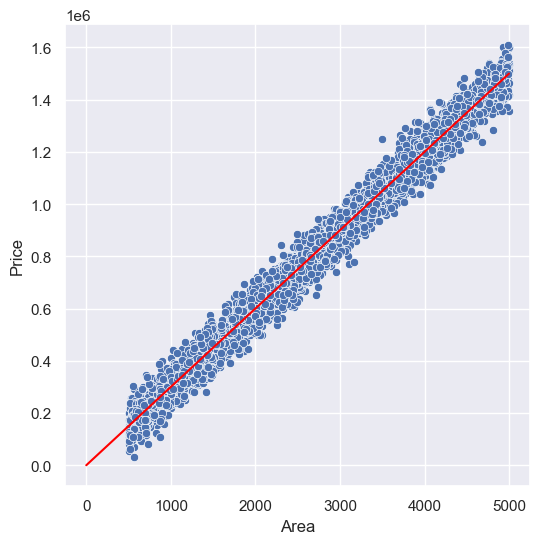

In [45]:
# drawing the linear line in the plane

x = np.arange(0, 5000)
y = model.coef_*x + model.intercept_


plt.figure(figsize=(6,6))
sns.scatterplot(df, x = 'Area', y = 'Price')
sns.lineplot(x=x, y=y, color="red")
plt.show()

The drawn hyperplane (line) is the line where the "Sum of squared errors" are minimum

Getting the overall error

In [50]:
y_preds = model.predict(X)

print(f"Mean squared error is: {mean_squared_error(y_preds, df.Price)}")

Mean squared error is: 2473484398.991169


Here, we used the entire data, not a good way

In [ ]:
# splitting the data

X = df[['Area']]
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(f"Train data size: {x_train.shape[0]}")
print(f"Test data size: {x_test.shape[0]}")

Train data size: 3200
Test data size: 800


In [53]:
# model training
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
# weights got

print(f"slope/weight: {model.coef_}")
print(f"intercept: {model.intercept_}")

slope/weight: [300.1932629]
intercept: -511.787841196754


We can observe that, the values of slope and weight are changed, because of change in data

So, more data, gives more better prediction

In [55]:
# train error and test error

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_error = mean_squared_error(y_pred_train, y_train)
test_error = mean_squared_error(y_pred_test, y_test)

In [56]:
print(f"Train error is: {train_error}")
print(f"Test error is: {test_error}")

Train error is: 2479508427.18658
Test error is: 2449596330.164133


Here as the money is in lacks, so the error sum seems to be soo high

both train and test errors are high

So, the model is underfitting